# Import libraries

In [63]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [64]:
df =pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")

In [65]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [66]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
81,Gujarat,30-06-2019,Monthly,4.77,13199281.0,50.12,Rural
205,Meghalaya,31-07-2019,Monthly,1.03,1158511.0,66.67,Rural
317,Tripura,30-06-2020,Monthly,18.84,1106978.0,59.74,Rural
404,Bihar,31-08-2019,Monthly,17.66,2994763.0,38.03,Urban
709,Tripura,30-04-2020,Monthly,34.88,296431.0,47.65,Urban


In [67]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [68]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [69]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [70]:
df[df.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.isnull().sum().sum()

7

In [85]:
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

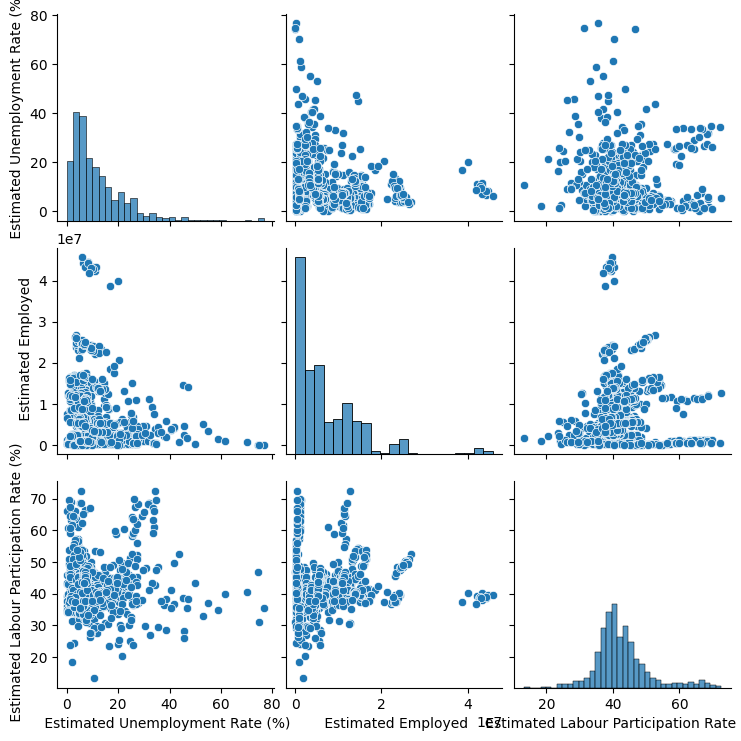

In [86]:
sns.pairplot(df)

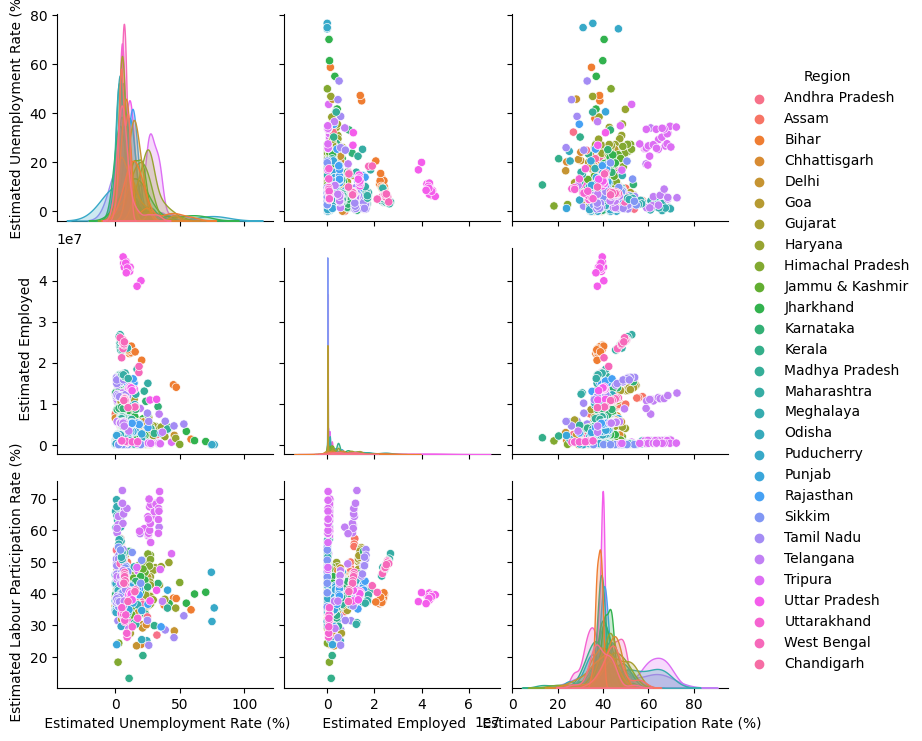

In [72]:
sns.pairplot(data = df , hue = 'Region')

In [88]:
df.Region.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

<Axes: >

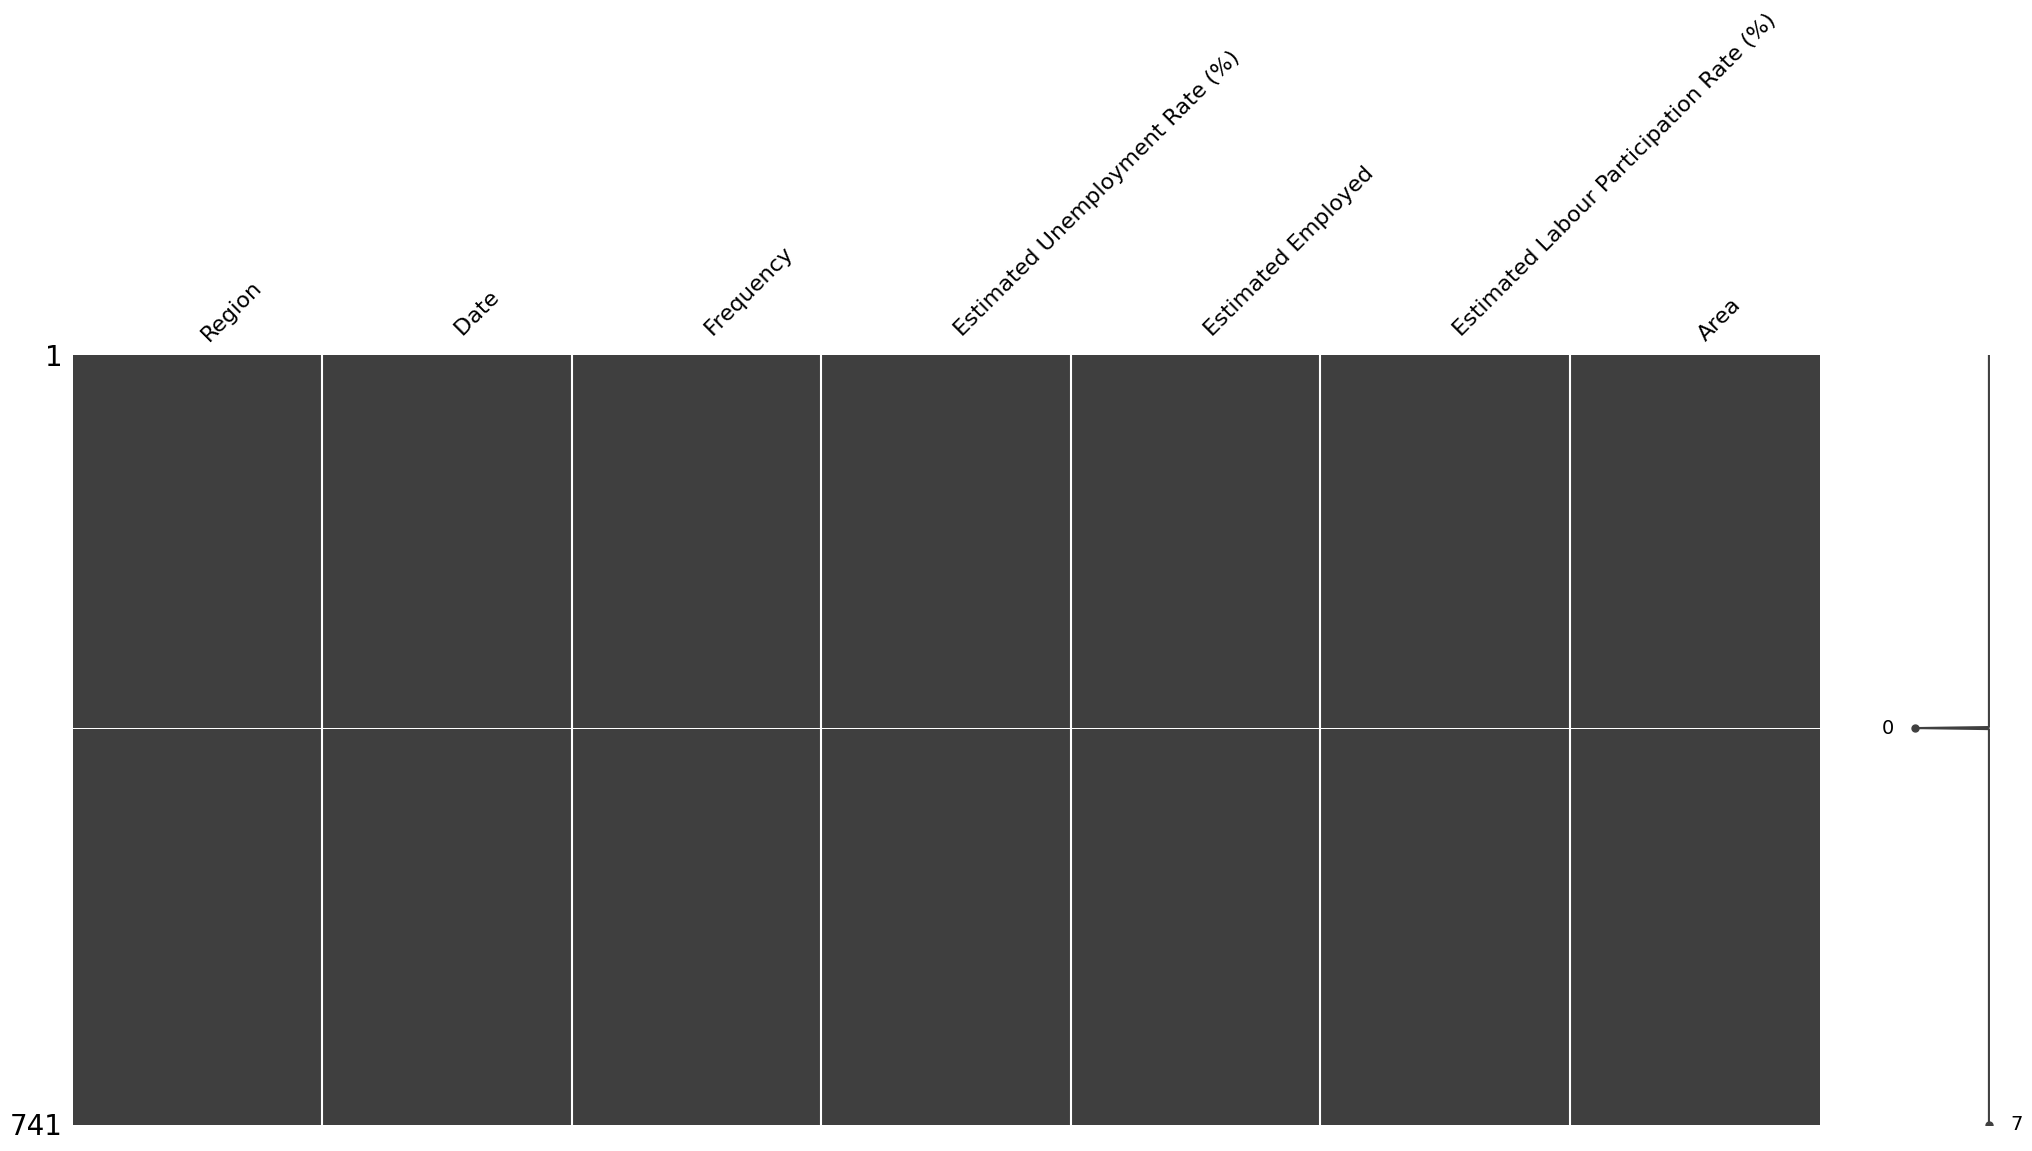

In [89]:
import missingno as msno
msno.matrix(df)

<Axes: ylabel='count'>

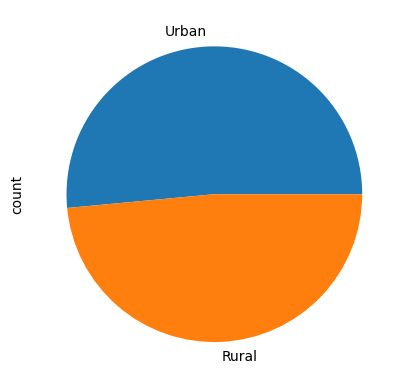

In [75]:
df['Area'].value_counts().plot.pie()


<Axes: ylabel='count'>

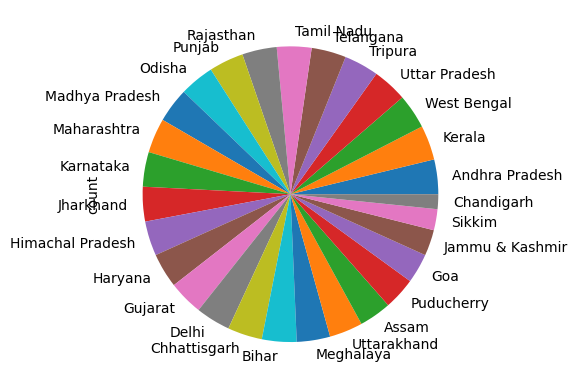

In [76]:
df['Region'].value_counts().plot.pie()


<Axes: xlabel='Area'>

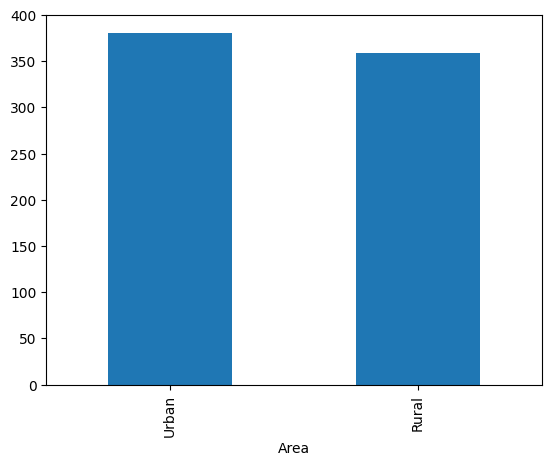

In [77]:
df['Area'].value_counts().plot.bar()
